In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import BatchNormalization

Download and prepare mnist dataset

In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_images=train_images.reshape(60000,28,28,1)
test_images=test_images.reshape(10000,28,28,1)

In [4]:
train_images.shape

(60000, 28, 28, 1)

In [5]:
test_images.shape

(10000, 28, 28, 1)

In [6]:
train_images=train_images.astype('float32')# change integers to 32-bit floating point numbers
test_images=test_images.astype('float32')

# Normalise

In [7]:
train_images=train_images/255
test_images=test_images/255

In [8]:
class_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

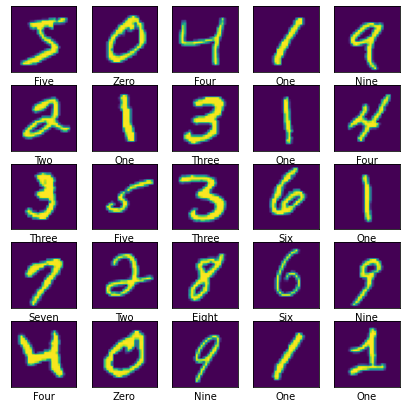

In [25]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,7))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow((tf.squeeze(train_images[i])))
  plt.xlabel(class_names[train_labels[i]])


plt.show()
  


# Create Cnn

In [11]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
layers.Dropout(0.5)
model.add(BatchNormalization())
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
layers.Dropout(0.5)
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                        

Now add Dense Layers

In [13]:
model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
layers.Dropout(0.5)
model.add(layers.BatchNormalization())

model.add(layers.Dense(10))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                        

# Compile the model

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the Model

In [16]:
model.fit(train_images,train_labels,epochs=15,batch_size=64)

Epoch 1/15
938/938 [==============================] - 70s 73ms/step - loss: 0.0934 - accuracy: 0.9725
Epoch 2/15
938/938 [==============================] - 68s 73ms/step - loss: 0.0375 - accuracy: 0.9885
Epoch 3/15
938/938 [==============================] - 69s 73ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 4/15
938/938 [==============================] - 70s 75ms/step - loss: 0.0209 - accuracy: 0.9936
Epoch 5/15
938/938 [==============================] - 69s 73ms/step - loss: 0.0177 - accuracy: 0.9941
Epoch 6/15
938/938 [==============================] - 70s 75ms/step - loss: 0.0127 - accuracy: 0.9961
Epoch 7/15
938/938 [==============================] - 70s 75ms/step - loss: 0.0107 - accuracy: 0.9965
Epoch 8/15
938/938 [==============================] - 70s 74ms/step - loss: 0.0089 - accuracy: 0.9971
Epoch 9/15
938/938 [==============================] - 70s 74ms/step - loss: 0.0083 - accuracy: 0.9974
Epoch 10/15
938/938 [==============================] - 71s 76ms/step - loss: 0.008

In [17]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

print('\nTest Loss :',test_loss)
print('\nTest acc :',test_acc)

313/313 - 3s - loss: 0.0313 - accuracy: 0.9924 - 3s/epoch - 11ms/step

Test Loss : 0.031302426010370255

Test acc : 0.9923999905586243


In [18]:
prediction=model.predict(test_images)
prediction[0]

array([-3.6570928, -1.928965 , -1.099041 ,  0.8545082,  3.503317 ,
       -5.0834866, -5.5820546, 20.894508 , -5.6282473, -1.7437431],
      dtype=float32)

or

In [19]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

prediction_softmax=probability_model.predict(test_images)
prediction_softmax[0]

array([2.1745781e-11, 1.2243107e-10, 2.8075203e-10, 1.9803330e-09,
       2.7996355e-08, 5.2227610e-12, 3.1723055e-12, 1.0000000e+00,
       3.0291028e-12, 1.4734385e-10], dtype=float32)

In [20]:
import numpy as np

np.argmax(prediction[0])


7

In [21]:
np.argmax(prediction_softmax[0])

7

In [ ]:
_